In [1]:
%matplotlib notebook

import numpy as np
import scipy as sp
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from sympy import *

In [2]:
df = pd.read_csv("fods_1.csv")
data_count = len(df)

<IPython.core.display.Javascript object>


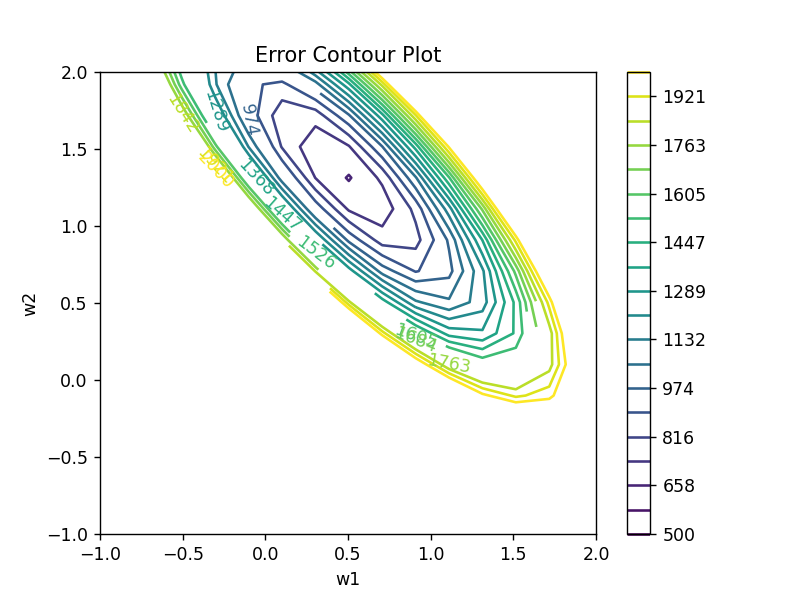

In [3]:
w1 = np.linspace(-10, 10, 100)
w2 = np.linspace(-10, 10, 100)
  
# Creating 2-D grid of features
W1,W2 = np.meshgrid(w1, w2)
  
fig, ax = plt.subplots(1, 1)
  
Z = 0
for x1, x2, t in df.values:
    Z += np.square(W1*x1+W2*x2 - t)
    
Z/=2
    
# plots contour lines
levels = np.linspace(500, 2000, 20)
CP = ax.contour(W1, W2, Z, levels=levels)

ax.clabel(CP, CP.levels, inline=True, fontsize=10)
  
ax.set_title('Error Contour Plot')
ax.set_xlabel('w1')
ax.set_ylabel('w2')

plt.colorbar(CP,ax=ax)

plt.xlim(-1,2)
plt.ylim(-1,2)
  
plt.draw()

i) The error contour plot using given error function

<IPython.core.display.Javascript object>


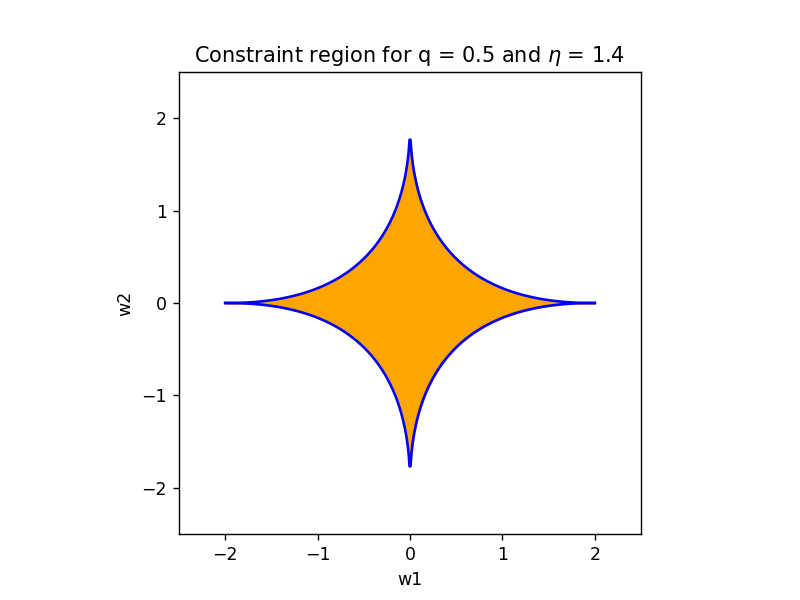

In [4]:
# q = 0.5 and eta = 1.4
# np.sqrt(abs(w1)) + np.sqrt(abs(w2)) <= eta

eta_CR1 = 1.4
w1_linspace_CR1 = np.linspace(-2,2,400)

w2_graph_top_CR1 = np.square(eta_CR1 - np.sqrt(abs(w1_linspace_CR1)))
w2_graph_bottom_CR1 = -np.square(eta_CR1 - np.sqrt(abs(w1_linspace_CR1)))

plt.figure()

plt.plot(w1_linspace_CR1, w2_graph_top_CR1, color = "blue")
plt.plot(w1_linspace_CR1, w2_graph_bottom_CR1, color = "blue")

w2_graph_min_CR1 = np.minimum(w2_graph_top_CR1, w2_graph_bottom_CR1)
w2_graph_max_CR1 = np.maximum(w2_graph_top_CR1, w2_graph_bottom_CR1)

plt.fill_between(w1_linspace_CR1, w2_graph_min_CR1, w2_graph_max_CR1, color="orange")

plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))

plt.xlabel('w1')
plt.ylabel('w2')
plt.title("Constraint region for q = 0.5 and $\eta$ = 1.4")
ax = plt.gca()
ax.set_aspect("equal", adjustable = "box")

plt.draw()

<IPython.core.display.Javascript object>


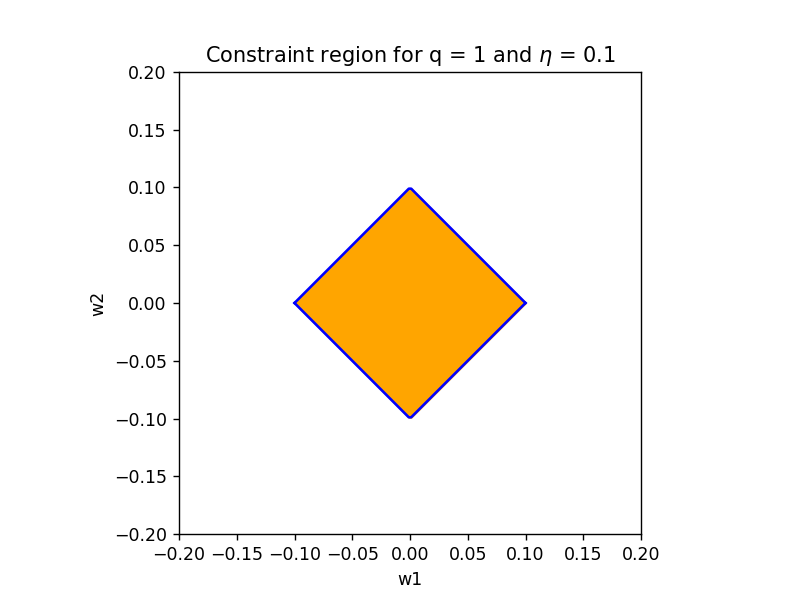

In [5]:
# q = 1 and eta = 0.1
# abs(w1) + abs(w2) <= eta

eta_CR2 = 0.1
w1_linspace_CR2 = np.linspace(-0.1,0.1,100)

w2_graph_top_CR2 = (eta_CR2 - abs(w1_linspace_CR2))
w2_graph_bottom_CR2 = -(eta_CR2 - abs(w1_linspace_CR2))

plt.figure()

plt.plot(w1_linspace_CR2, w2_graph_top_CR2, color = "blue")
plt.plot(w1_linspace_CR2, w2_graph_bottom_CR2, color = "blue")

w2_graph_min_CR2 = np.minimum(w2_graph_top_CR2, w2_graph_bottom_CR2)
w2_graph_max_CR2 = np.maximum(w2_graph_top_CR2, w2_graph_bottom_CR2)

plt.fill_between(w1_linspace_CR2, w2_graph_min_CR2, w2_graph_max_CR2, color="orange")

plt.xlim((-0.2, 0.2))
plt.ylim((-0.2, 0.2))

plt.xlabel('w1')
plt.ylabel('w2')
plt.title("Constraint region for q = 1 and $\eta$ = 0.1")

ax = plt.gca()
ax.set_aspect("equal", adjustable = "box")

plt.draw()

<IPython.core.display.Javascript object>


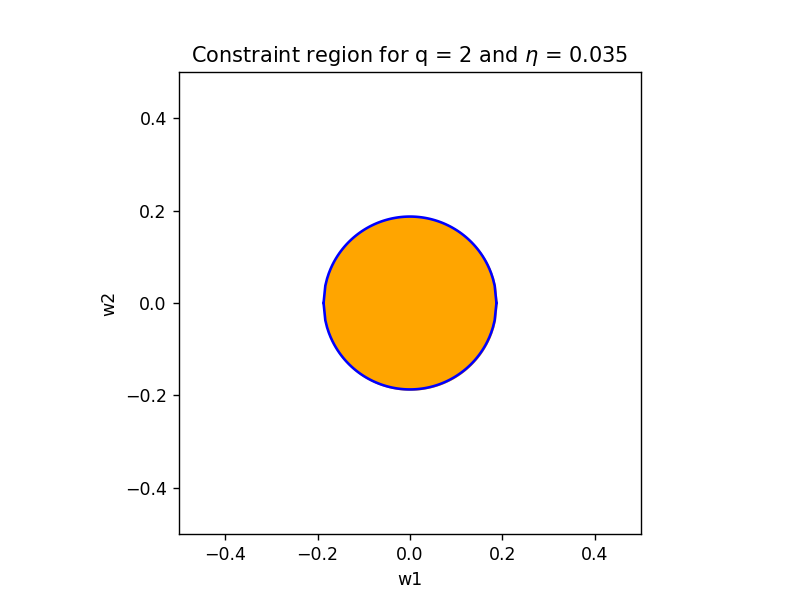

In [6]:
# q = 2 and eta = 0.035
# abs(w1)^2 + abs(w2)^2 <= eta

eta_CR3 = 0.035
w1_linspace_CR3 = np.linspace(-np.sqrt(eta_CR3),np.sqrt(eta_CR3),100)

w2_graph_top_CR3 = np.sqrt((eta_CR3 - np.square(abs(w1_linspace_CR3))))
w2_graph_bottom_CR3 = -np.sqrt((eta_CR3 - np.square(abs(w1_linspace_CR3))))

plt.figure()

plt.plot(w1_linspace_CR3, w2_graph_top_CR3, color = "blue")
plt.plot(w1_linspace_CR3, w2_graph_bottom_CR3, color = "blue")

w2_graph_min_CR3 = np.minimum(w2_graph_top_CR3, w2_graph_bottom_CR3)
w2_graph_max_CR3 = np.maximum(w2_graph_top_CR3, w2_graph_bottom_CR3)

plt.fill_between(w1_linspace_CR3, w2_graph_min_CR3, w2_graph_max_CR3, color="orange")

plt.xlim((-0.5, 0.5))
plt.ylim((-0.5, 0.5))

plt.xlabel('w1')
plt.ylabel('w2')
plt.title("Constraint region for q = 2 and $\eta$ = 0.035")


ax = plt.gca()
ax.set_aspect("equal", adjustable = "box")

plt.draw()

<IPython.core.display.Javascript object>


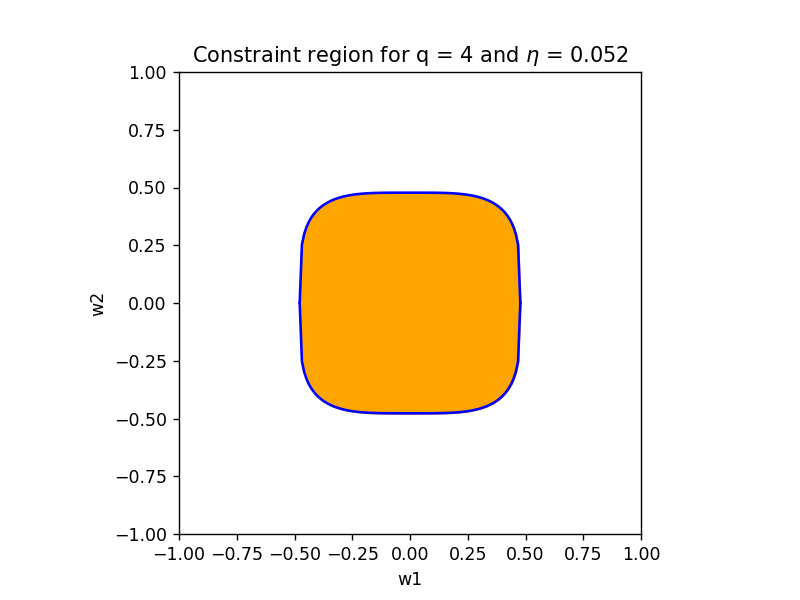

In [7]:
# q = 4 and eta = 0.052
# abs(w1)^4 + abs(w2)^4 <= eta

eta_CR4 = 0.052
w1_linspace_CR4 = np.linspace(-np.power(eta_CR4, 0.25),np.power(eta_CR4, 0.25),100)

w2_graph_top_CR4 = np.power((eta_CR4 - np.power(abs(w1_linspace_CR4), 4)), 0.25)
w2_graph_bottom_CR4 = -np.power((eta_CR4 - np.power(abs(w1_linspace_CR4), 4)), 0.25)

plt.figure()

plt.plot(w1_linspace_CR4, w2_graph_top_CR4, color = "blue")
plt.plot(w1_linspace_CR4, w2_graph_bottom_CR4, color = "blue")

w2_graph_min_CR4 = np.minimum(w2_graph_top_CR4, w2_graph_bottom_CR4)
w2_graph_max_CR4 = np.maximum(w2_graph_top_CR4, w2_graph_bottom_CR4)

plt.fill_between(w1_linspace_CR4, w2_graph_min_CR4, w2_graph_max_CR4, color="orange")

plt.xlim((-1, 1))
plt.ylim((-1, 1))

plt.xlabel('w1')
plt.ylabel('w2')
plt.title("Constraint region for q = 4 and $\eta$ = 0.052")


ax = plt.gca()
ax.set_aspect("equal", adjustable = "box")

plt.draw()

Tangential contour and Constraint Region 1 Intersection

<IPython.core.display.Javascript object>


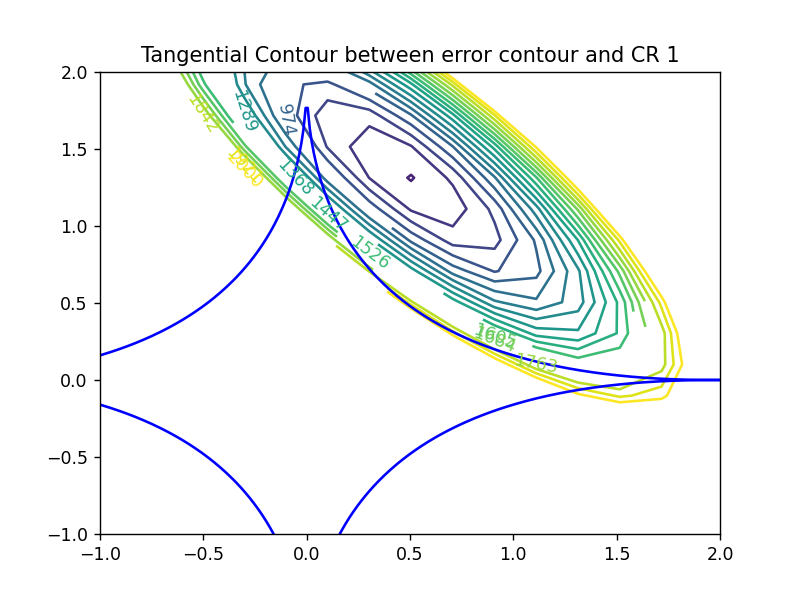

In [8]:
accumulator = list()

fig, ax = plt.subplots()
CP = ax.contour(W1, W2, Z, levels=levels)

ax.clabel(CP, CP.levels, inline=True, fontsize=10)

plt.plot(w1_linspace_CR1, w2_graph_top_CR1, color = "blue")
plt.plot(w1_linspace_CR1, w2_graph_bottom_CR1, color = "blue")

def f(x):
    Z_1 = 0
    accumulator.append(x)
    for x1,x2,t in df.values:
        Z_1+=np.square((x[0]*x1 + x[1]*x2 - t))
    Z_1/=2
    return Z_1

def constraint(x):
    return np.atleast_1d(1.4 - np.power(abs(x[0]), 0.5) - np.power(abs(x[1]), 0.5))

res_1 = optimize.minimize(f, np.array([0, 1.96]), method="SLSQP", constraints={"fun": constraint, "type": "eq"})

accumulated = np.array(accumulator)

plt.title("Tangential Contour between error contour and CR 1")
plt.xlim(-1,2)
plt.ylim(-1,2)

plt.draw()

The Intersection point (i.e where the minima occurs) between the error contour and the constraint region is [w1, w2] = [0.00594729, 1.75001506].
The Sum of Squares Error at that point is 820.887

Tangential contour and Constraint Region 2 Intersection

<IPython.core.display.Javascript object>


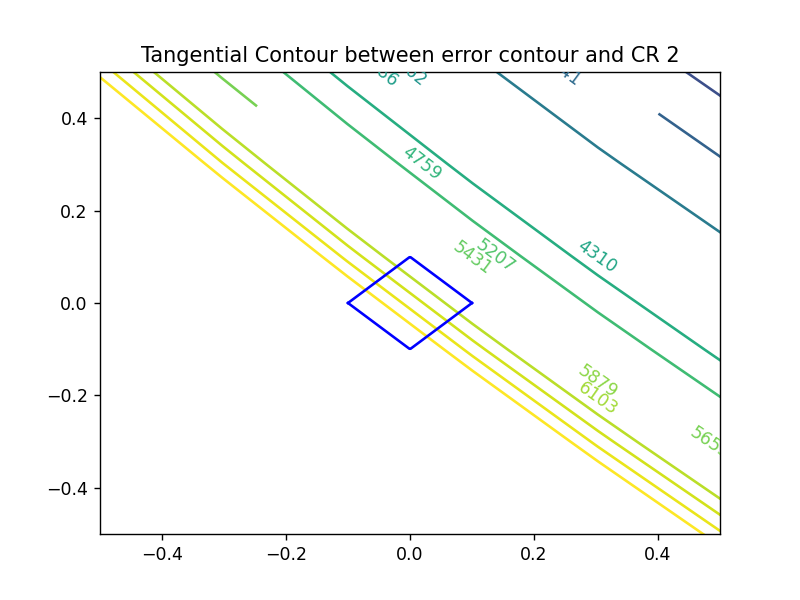

In [9]:
accumulator = list()

fig, ax = plt.subplots()
levels2 = np.linspace(500, 7000,30)
CP = ax.contour(W1, W2, Z, levels=levels2)

ax.clabel(CP, CP.levels, inline=True, fontsize=10)

plt.plot(w1_linspace_CR2, w2_graph_top_CR2, color = "blue")
plt.plot(w1_linspace_CR2, w2_graph_bottom_CR2, color = "blue")

def f(x):
    Z_1 = 0
    accumulator.append(x)
    for x1,x2,t in df.values:
        Z_1+=np.square((x[0]*x1 + x[1]*x2 - t))
    Z_1/=2
    return Z_1

def constraint(x):
    return np.atleast_1d(0.1 - abs(x[0]) - abs(x[1]))

res_2 = optimize.minimize(f, np.array([0, 0.1]), method="SLSQP", constraints={"fun": constraint, "type": "eq"})

accumulated = np.array(accumulator)

plt.title("Tangential Contour between error contour and CR 2")
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

plt.draw()

The Intersection point (i.e where the minima occurs) between the error contour and the constraint region is [w1, w2] = [0.09123877, 0.00876123].
The Sum of Squares Error at that point is 6029.701

Tangential contour and Constraint Region 3 Intersection

<IPython.core.display.Javascript object>


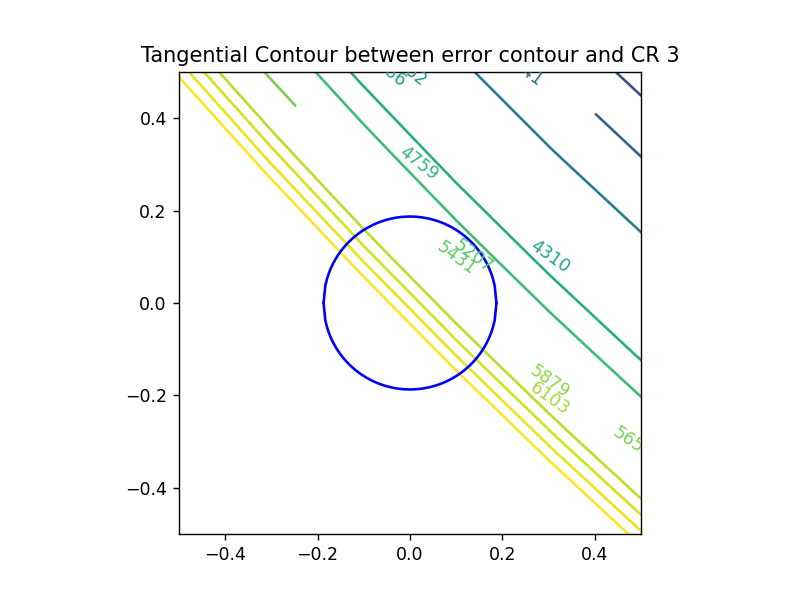

In [10]:
accumulator = list()

fig, ax = plt.subplots()
levels2 = np.linspace(500, 7000,30)
CP = ax.contour(W1, W2, Z, levels=levels2)

ax.clabel(CP, CP.levels, inline=True, fontsize=10)
ax.set_aspect("equal", "box")

plt.plot(w1_linspace_CR3, w2_graph_top_CR3, color = "blue")
plt.plot(w1_linspace_CR3, w2_graph_bottom_CR3, color = "blue")

def f(x):
    Z_1 = 0
    accumulator.append(x)
    for x1,x2,t in df.values:
        Z_1+=np.square((x[0]*x1 + x[1]*x2 - t))
    Z_1/=2
    return Z_1

def constraint(x):
    return np.atleast_1d(0.035 - np.square(abs(x[0])) - np.square(abs(x[1])))

res_3 = optimize.minimize(f, np.array([0.1, np.sqrt(0.035)]), method="SLSQP", constraints={"fun": constraint, "type": "eq"})

accumulated = np.array(accumulator)

plt.title("Tangential Contour between error contour and CR 3")
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

plt.draw()

The Intersection point (i.e where the minima occurs) between the error contour and the constraint region is [w1, w2] = [0.13222999, 0.13234511].
The Sum of Squares Error at that point is 5045.281

Tangential contour and Constraint Region 4 Intersection

<IPython.core.display.Javascript object>


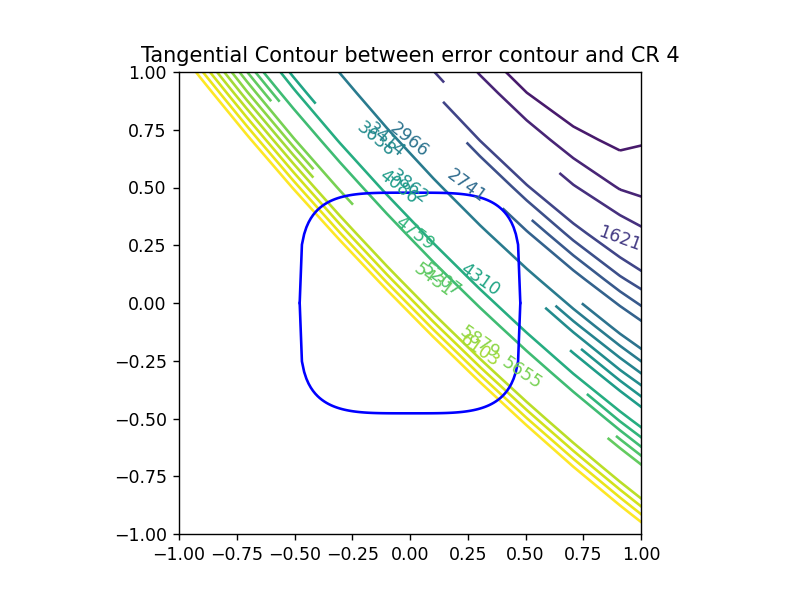

In [11]:
accumulator = list()

fig, ax = plt.subplots()
levels2 = np.linspace(500, 7000,30)
CP = ax.contour(W1, W2, Z, levels=levels2)

ax.clabel(CP, CP.levels, inline=True, fontsize=10)
ax.set_aspect("equal", "box")

plt.plot(w1_linspace_CR4, w2_graph_top_CR4, color = "blue")
plt.plot(w1_linspace_CR4, w2_graph_bottom_CR4, color = "blue")

def f(x):
    Z_1 = 0
    accumulator.append(x)
    for x1,x2,t in df.values:
        Z_1+=np.square((x[0]*x1 + x[1]*x2 - t))
    Z_1/=2
    return Z_1

def constraint(x):
    return np.atleast_1d(0.052 - np.power(abs(x[0]),4) - np.power(abs(x[1]),4))

res_4 = optimize.minimize(f, np.array([0, np.power(0.052, 0.25)]), method="SLSQP", constraints={"fun": constraint, "type": "eq"})

accumulated = np.array(accumulator)

plt.title("Tangential Contour between error contour and CR 4")
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.draw()

The Intersection point (i.e where the minima occurs) between the error contour and the constraint region is [w1, w2] = [0.39742991, 0.40555369].
The Sum of Squares Error at that point is 2535.209.

In [12]:
print("iii) The Mean Squared Error for each w1 and w2 on the polynomial y(x1,x2) = w1*x1 + w2*x2 is\n")
print("\tThe MSE for case 1 is " + str(res_1.fun/data_count))
print("\tThe MSE for case 2 is " + str(res_2.fun/data_count))
print("\tThe MSE for case 3 is " + str(res_3.fun/data_count))
print("\tThe MSE for case 4 is " + str(res_4.fun/data_count))

iii) The Mean Squared Error for each w1 and w2 on the polynomial y(x1,x2) = w1*x1 + w2*x2 is

	The MSE for case 1 is 1.5034563324425156
	The MSE for case 2 is 11.043409784116067
	The MSE for case 3 is 9.240443222101723
	The MSE for case 4 is 4.643240049914559
